# Ratio Plots with root_numpy & rootpy

This is a check to see if I can run my stuff with root_numpy and rootpy :P

---

Start by importing my modules... 
Numpy, root_numpy, ROOT, rootpy.plotting

I don't know man.. just put stuff there..

Oh also put style :D

In [1]:
import numpy as np

In [2]:
import root_numpy as rtnp

In [3]:
import ROOT as rt

In [4]:
from rootpy.plotting import Hist, Hist2D, Canvas, Pad  # for histograms

In [5]:
from rootpy.io import root_open

In [6]:
from hsg3_style import *

---

Open my file with root_open (rootpy.io)



In [7]:
infile = root_open('vbf125spin2pmin.root','read')

----

Let's make it simple for newbs... now get the tree...

---


In [8]:
intree = infile.MVATree

In [9]:
intree

Tree('MVATree')

---


Now that's why I love root_numpy...

Dump the whole tree into a structured numpy array!!!

---

In [10]:
data = rtnp.tree2array(intree) # SO SIMPLE!

---

Now I can get one branch by simply doing....

---

In [11]:
data['Mll']

array([  83006.0546875 ,   27705.55273438,   85706.3203125 ,
         51483.35546875,   34970.0703125 ,   18112.34375   ,
         36089.0078125 ,   69110.421875  ,   48663.67578125,
         36606.26171875,   82781.1171875 ,   82891.5390625 ,
         26933.07617188,   23514.26953125,   79589.1015625 ,
         73283.375     ,   57630.70703125,   56764.75      ,
         54881.94140625,   54761.48828125,   52599.47265625,
         56533.2265625 ,   46447.58203125,   51928.734375  ,
         38718.99609375,   29393.765625  ,   37856.1875    ,
         54143.703125  ,   61532.98046875,   31187.078125  ,
         46644.29296875,   69584.0078125 ,   24573.61914062,
         47993.171875  ,   73869.3515625 ,   33335.34765625,
         35476.8984375 ,   54044.08984375,   74347.8671875 ,
         48382.52734375,   35519.76953125,   58710.98828125,
         62842.71484375,   83496.0390625 ,   71203.859375  ,
         39566.19921875,   46217.01171875,   36541.71484375,
         32513.41601562,

--- 

<b>REMEMBER:</b>
If you don't know the name of the tree or branches.. or even structures you can use

list_trees(), list_structures(), list_branches()

for example....


In [12]:
branches = rtnp.list_branches("vbf125spin2pmin.root")

In [13]:
branches

['EventWeight',
 'Mll',
 'MT',
 'MT_TrackHWW_Clj',
 'Mtt',
 'Mtt_TrackHWW_Clj',
 'Ptll',
 'DPhill',
 'METRel',
 'MET',
 'MET_phi',
 'METRel_TrackHWW_Clj',
 'MET_TrackHWW_Clj',
 'MET_phi_TrackHWW_Clj',
 'MW0_TrackHWW_Clj',
 'MW1_TrackHWW_Clj',
 'lepPt0',
 'lepPt1',
 'lepEta0',
 'lepEta1',
 'lepPhi0',
 'lepPhi1',
 'jetPt0',
 'jetEta0',
 'jetPhi0',
 'MinDPhi_TrackHWW_Clj',
 'DEtall',
 'm_el_n',
 'm_mu_n',
 'm_jet_n',
 'nbt',
 'RunNumber',
 'EventNumber',
 'mc_channel_number',
 'mva_weight',
 'spin2_mva_weight',
 'mcevt_pdf_id1',
 'mcevt_pdf_id2',
 'mcevt_pdf_x1',
 'mcevt_pdf_x2',
 'mcevt_pdf_scale',
 'MTtruth',
 'lepID0',
 'lepID1',
 'MVAEventWeight',
 'pileupEventWeight',
 'pileupEventWeight_090',
 'pileupEventWeight_080',
 'lepTrigSFEventWeight',
 'lepTrigSFEventWeightUp',
 'lepTrigSFEventWeightDown',
 'lepSF0Error',
 'lepSF1Error',
 'lepSF0ErrorIso',
 'lepSF1ErrorIso',
 'lepSF0EventWeight',
 'lepSF1EventWeight',
 'MV120_85_EventWeight',
 'MV120_85_CTJetWeight',
 'MV120_85_BJetWeight',


----

Good eh? (''kalo e?'')

---

Anyways, now we can have the 'Mll' branch out of the tree...

Lets make a histogram to store the mll variable

In [14]:
hist_mll = Hist(10, 0,200, name="mll", title="mll;m(ll);Entries/20GeV")

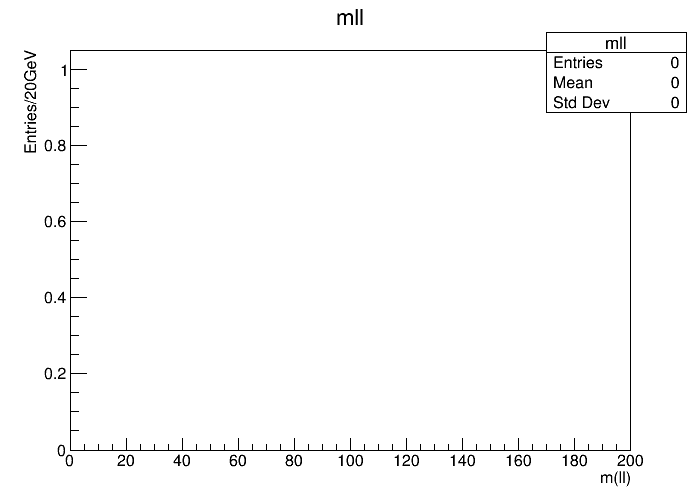

In [15]:
hist_mll

---
Let's use the default 'ATLAS' style of roottpy (I dont like it hmm, but to bored to make it myself)

In [16]:
from rootpy.plotting.style import get_style, set_style

In [17]:
style = get_hgs3_style()#set_style(#'ATLAS')

In [18]:
#style.SetLabelOffset(0.4,'y')

In [19]:
set_style(style)

INFO:rootpy.plotting.style:using ROOT style ''


-------

Anyways let's fill the histogram..

<b> Remember </b> Mll is in [MeV] so simply divide each index by 1000. to get GeV's


<b> WEIGHTS: </b> 

This is Monte Carlo sample. So the events are weighted! The weights are stored in the 'EventWeight' branch.. So simply use it as weights, like this:


In [20]:
rtnp.fill_hist(hist_mll, data['Mll']/1000., weights=data['EventWeight'])

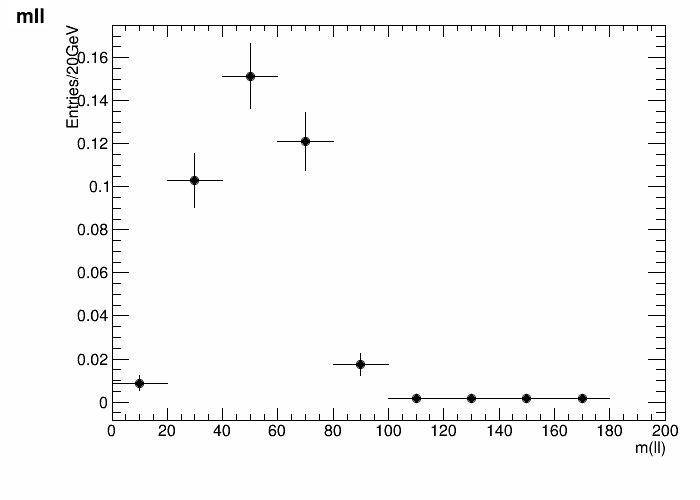

In [21]:
hist_mll

----


Make a canvas...

class rootpy.plotting.Canvas(width=None, height=None, x=None, y=None, name=None, title=None, size_includes_decorations=False)

In [22]:
canvas = Canvas(800,600,name='c1')

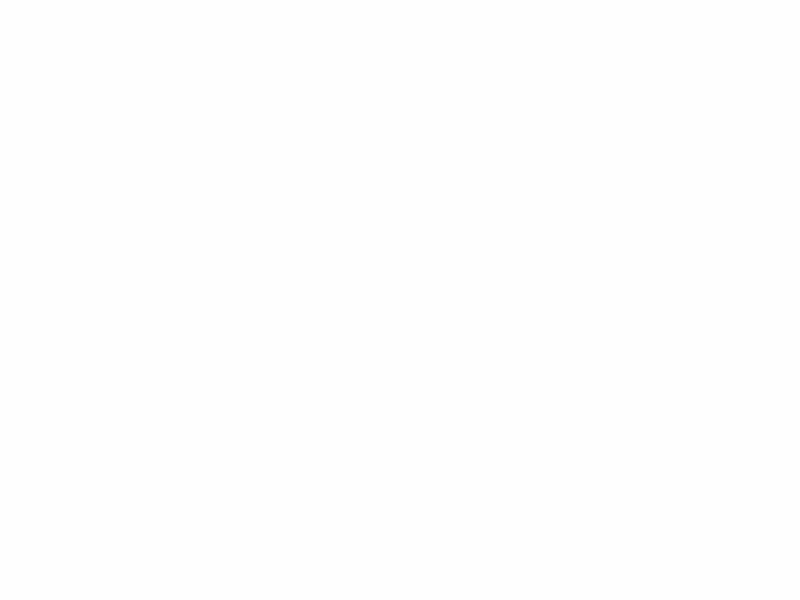

In [23]:
canvas.cd()

Let's make a fake ratio plot

In [24]:
ratio = hist_mll.Clone()

In [25]:
ratio.Divide(hist_mll)

True

In [26]:
pad_hist = Pad(0,0.3,1,1); set_pad_style(pad_hist); pad_hist.Draw()

In [27]:
pad_ratio = Pad(0,0,1,0.3); set_subpad_style(pad_ratio); pad_ratio.Draw()

In [28]:
pad_hist.cd()

Pad('Pad_z8LrwSJGs3QhrUSK44p66C')

In [29]:
hist_mll.Draw()

In [30]:
pad_ratio.cd()

Pad('Pad_i4gYQRgwJGWznh2q5qcELU')

In [31]:
ratio.draw('E4')

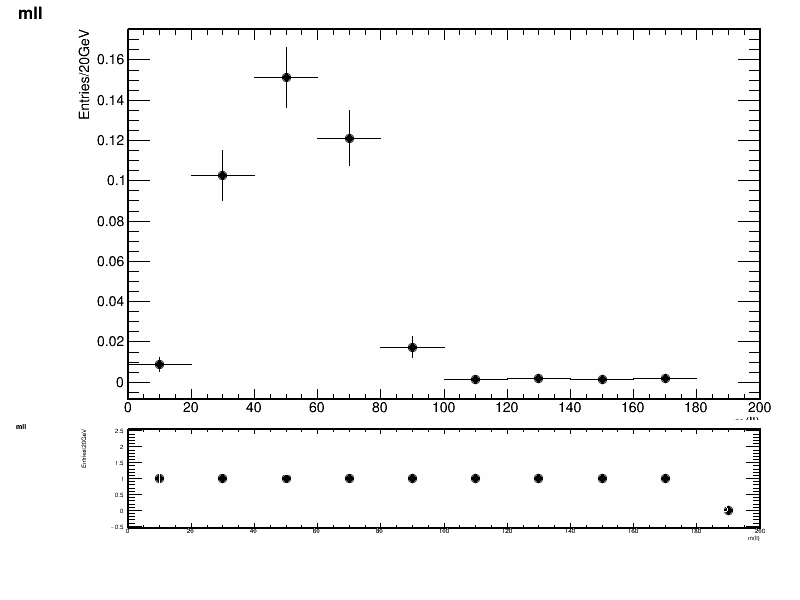

In [32]:
canvas

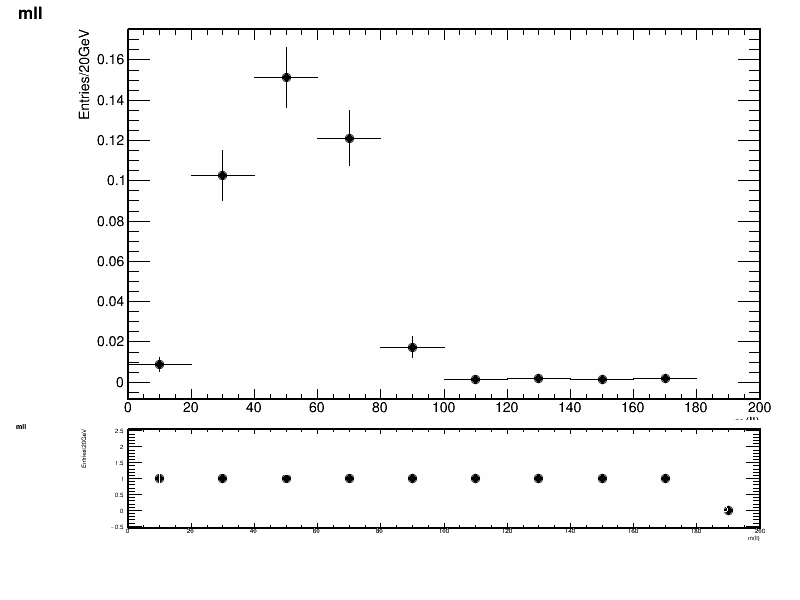

In [33]:
canvas